<a href="https://colab.research.google.com/github/lerakutt2/myprojects/blob/main/moad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи
Дано: количество просмотров и скачиваний в несколько моментов времени

Построить: линейную регрессию методом наименьших квадратов, предсказать количество просмотров по количеству скачиваний и наоборот.

TODO: 1) формула стандартного отклонения, общие выводы по первому заданию, литература.

2) комментарии, описание функций numpy (я так понимаю используемых), выводы по метрикам, общие выводы, ответы на вопросы, список литературы

In [ ]:
import numpy as np

t = np.arange(5, 15)
# просмотры
views = np.array([5252, 7620, 941, 1159, 485, 299, 239, 195, 181, 180])
# скачивания
regs = np.array([21, 46, 9, 8, 3, 6, 4, 2, 2, 2])

в графике легенда и все красиво всегда. умножить на 100 загрузки. просмотры - скачивания график
Вывод формул (сделать в ворде и вставить скрины), описание функций, сами формулы, выводы, литература

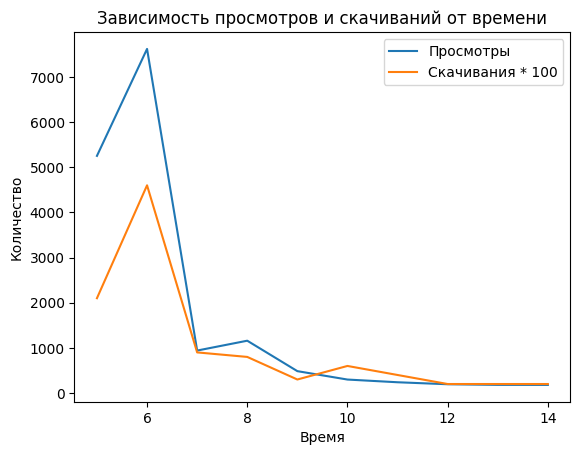

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t, views, label='Просмотры')
plt.plot(t, regs * 100, label='Скачивания * 100')
plt.xlabel('Время')
plt.ylabel('Количество')
plt.title('Зависимость просмотров и скачиваний от времени')
plt.legend()
plt.show()

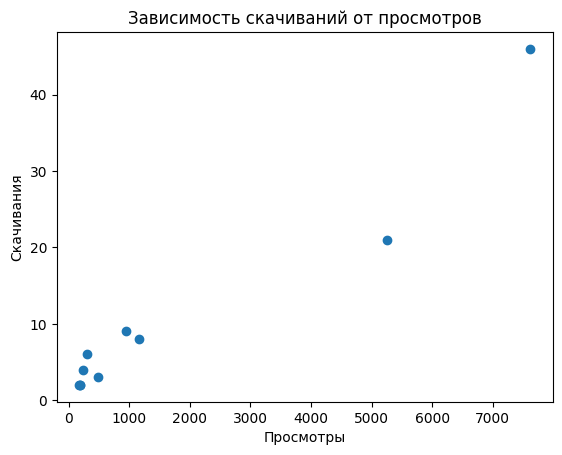

In [ ]:
plt.plot(views, regs, 'o')
plt.xlabel('Просмотры')
plt.ylabel('Скачивания')
plt.title('Зависимость скачиваний от просмотров')
plt.show()

# Метод наименьших квадратов
Требуется найти функцию f(x) = ax + b такую, что сумма погрешностей будет минимальна:

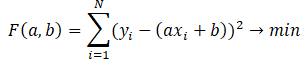

Найдём частные производные полученной функции и приравняем их к нулю.

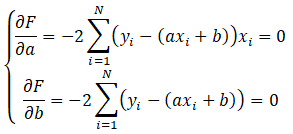

Преобразуем

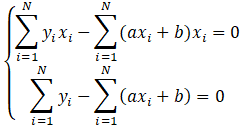

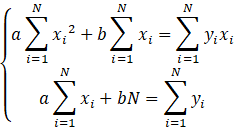

Найдём коэффициент b и выразим a через него

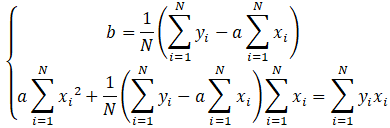

После преобразований получаем формулы коэффициентов а и b

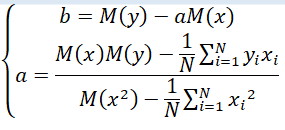

Где M(x) - математическое ожидание, вычисляется по формуле

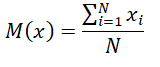

Далее будут использоваться также следующие формулы:

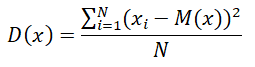,

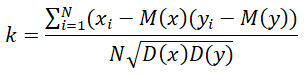,

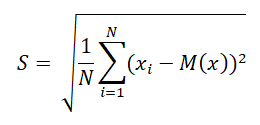

где D(x) - дисперсия x, S - стандартное отклонение, k - коэффициент корреляции x и y.


In [ ]:
import math

class LinearRegression:
  ''' Класс считает основные характеристики данных, нужные для
  построения линейной регрессии методом наименьших квадратов'''
  def __init__(self, x : np.ndarray, y : np.ndarray):
    self.x = x
    self.y = y
    self.n = x.size
    self.mx = self.M(x)
    self.my = self.M(y)
    self.dx = self.D(x)
    self.dy = self.D(y)
    self.correl_coef = self.__correl()
    self.a = self.__A()
    self.b = self.__B()
    self.sy = self.S(y)
    self.sx = self.S(x)


  def M(self, x : np.ndarray):
    ''' Математическое ожидание. Универсальная функция '''
    return x.sum() / x.size


  def D(self, x : np.ndarray):
    ''' Дисперсия. Универсальная функция '''
    return np.sum((x - self.M(x))**2) / x.size


  def S(self, x : np.ndarray):
    ''' Стандартное отклонение. Универсальная функция '''
    return math.sqrt(np.sum((x - self.M(x))**2) / (x.size))


  def __correl(self):
    ''' Коэффициент корреляции '''
    return np.sum((self.x - self.mx) * (self.y - self.my)) / (self.n * math.sqrt(self.dx * self.dy))


  def __A(self):
    ''' Параметр a для линейной регрессии (y = aх + b)'''
    return (self.mx * self.my - np.sum(self.x * self.y) / self.n) / (pow(self.mx, 2) - np.sum(self.x ** 2) / self.n)


  def __B(self):
    ''' Параметр b для линейной регрессии (y = aх + b) '''
    return self.my - self.a * self.mx


  def yline(self, x0):
    ''' Значение y для x0 '''
    return self.a * x0 + self.b


  def xline(self, y0):
    ''' Значение x для y0 '''
    return (y0 - self.b) / self.a


In [ ]:
regr = LinearRegression(views, regs)

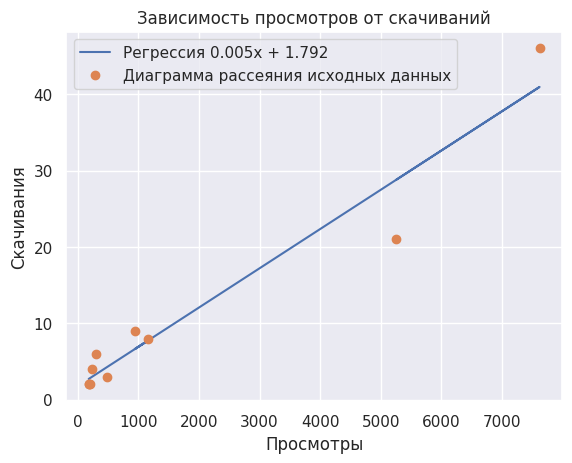

In [ ]:
plt.plot(views, regr.yline(views), label='Регрессия ' + "{:.3f}".format(regr.a) + 'x ' + '+ ' + "{:.3f}".format(regr.b))
plt.plot(views, regs, 'o', label='Диаграмма рассеяния исходных данных')
plt.xlabel('Просмотры')
plt.ylabel('Скачивания')
plt.title('Зависимость просмотров от скачиваний')
plt.legend()
plt.show()

При количестве посещений сайта в 8000 человек, сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт?

In [ ]:
round(regr.yline(8000))

43

Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?

In [ ]:
math.ceil(regr.xline(500))

96922

https://matplotlib.org/stable/tutorials/pyplot.html

https://habr.com/ru/companies/nerepetitor/articles/250633/

https://ru.hexlet.io/qna/python/questions/kak-zadat-tip-vozvraschaemogo-znacheniya-funktsii-v-python

In [ ]:
import pandas as pd

#df = pd.read_excel("/content/moad2.xlsx")
df = pd.DataFrame({'Views': views, 'Regs': regs})
df

,Views,Regs
0,5252,21
1,7620,46
2,941,9
3,1159,8
4,485,3
5,299,6
6,239,4
7,195,2
8,181,2
9,180,2


In [ ]:
df.describe()

,Views,Regs
count,10.000000,10.000000
mean,1655.100000,10.300000
std,2602.734436,13.800564
min,180.000000,2.000000
25%,206.000000,2.250000
50%,392.000000,5.000000
75%,1104.500000,8.750000
max,7620.000000,46.000000


In [ ]:
import numpy as np

views = df['Views']
regs = df['Regs']
print('Математическое ожидание для просмотров и скачиваний: \nСамописная функция:', regr.mx,',', regr.my, ', Numpy:',  np.mean(views),',', np.mean(regs))
print('Стандартное отклонение для просмотров и скачиваний: \nСамописная функция:', regr.sx,',', regr.sy, ', Numpy:',  np.std(views),',', np.std(regs))
print('Дисперсия для просмотров и скачиваний: \nСамописная функция:', regr.dx,',', regr.dy, ', Numpy:',  np.var(views),',', np.var(regs))
print('Коэффициент корреляции для просмотров и скачиваний: \nСамописная функция:', regr.correl_coef,',', 'Numpy:', np.corrcoef(views, regs))
print('Минимальное и максимальное значение просмотров:',  views.min(),',', np.max(views))
print('Минимальное и максимальное значение скачиваний:',  np.min(regs),',', np.max(regs))

Математическое ожидание для просмотров и скачиваний: 
Самописная функция: 1655.1 , 10.3 , Numpy: 1655.1 , 10.3
Стандартное отклонение для просмотров и скачиваний: 
Самописная функция: 2469.1706887131154 , 13.092364186807517 , Numpy: 2469.1706887131154 , 13.092364186807517
Дисперсия для просмотров и скачиваний: 
Самописная функция: 6096803.89 , 171.41000000000005 , Numpy: 6096803.89 , 171.41000000000005
Коэффициент корреляции для просмотров и скачиваний: 
Самописная функция: 0.9694433977097225 , Numpy: [[1.        0.9694434]
 [0.9694434 1.       ]]
Минимальное и максимальное значение просмотров: 180 , 7620
Минимальное и максимальное значение скачиваний: 2 , 46


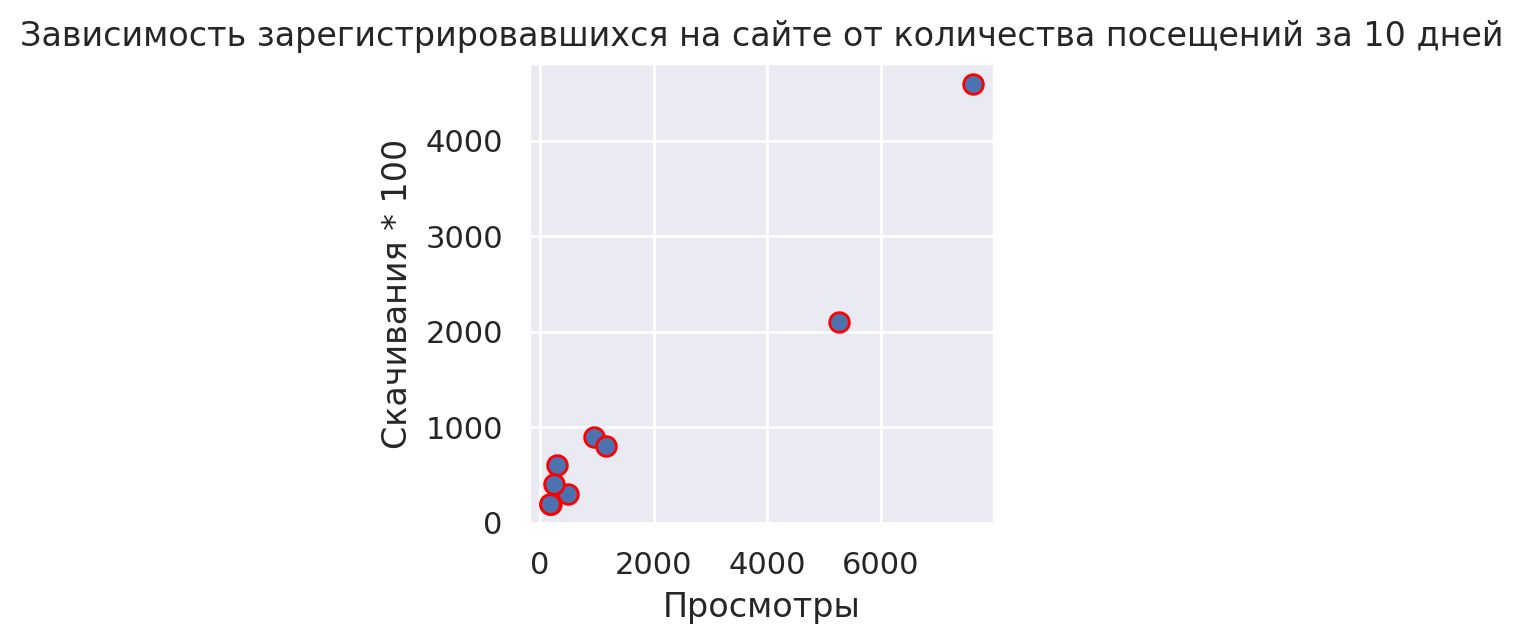

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize=(3, 3), dpi=200)
plt.scatter(views, regs * 100 , edgecolor="red", s=50)
plt.ylabel("Скачивания * 100")
plt.xlabel("Просмотры")
plt.title("Зависимость зарегистрировавшихся на сайте от количества посещений за 10 дней")
plt.show()

In [ ]:
print(views)
views.to_numpy().reshape(-1, 1)

0    5252
1    7620
2     941
3    1159
4     485
5     299
6     239
7     195
8     181
9     180
Name: Views, dtype: int64


array([[5252],
       [7620],
       [ 941],
       [1159],
       [ 485],
       [ 299],
       [ 239],
       [ 195],
       [ 181],
       [ 180]])

In [ ]:
from sklearn import linear_model

skregr = linear_model.LinearRegression()

x = views.to_numpy().reshape(-1, 1) # изменение размера массива, -1 - автоматический подбор размера. В данной случае получаем [[5252], [7620], ...]
y = regs.to_numpy()
skregr.fit(x, y)

LinearRegression()

In [ ]:
print("sklearn: a =", skregr.coef_, "b =", skregr.intercept_)
print("my: a =", regr.a, "b =", regr.b)

sklearn: a = [0.00514031] b = 1.7922707482723386
my: a = 0.005140311311538676 b = 1.7922707482723386


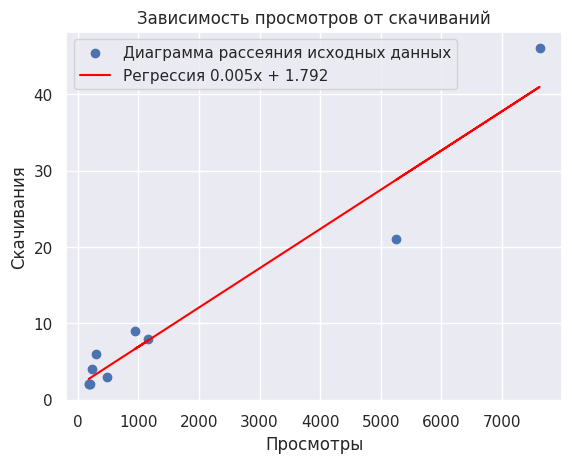

In [ ]:
plt.scatter(x, y, label='Диаграмма рассеяния исходных данных')
plt.plot(x, skregr.predict(x), label='Регрессия ' + "{:.3f}".format(skregr.coef_[0]) + 'x ' + '+ ' + "{:.3f}".format(skregr.intercept_), color='red')
plt.legend()
plt.title('Зависимость просмотров от скачиваний')
plt.xlabel('Просмотры')
plt.ylabel('Скачивания')
plt.show()

Формулы метрик.

Коэффициент детерминации

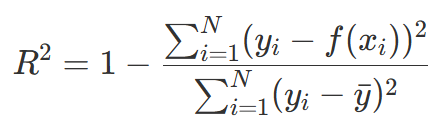

Средняя квадратическая ошибка

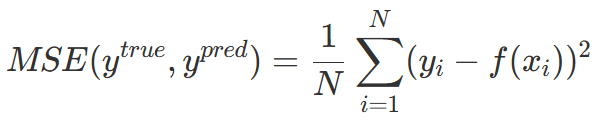

Средняя абсолютная ошибка

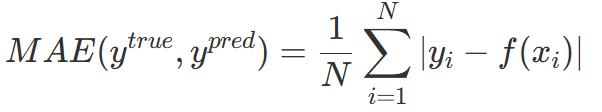

Средняя абсолютная процентная ошибка

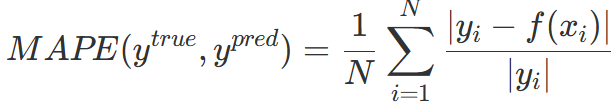

In [ ]:
import sklearn.metrics

y_pred = skregr.predict(x)

print("Коэффициент детерминации: ", sklearn.metrics.r2_score(y_pred, y))
print("Максимальная остаточная ошибка: ", sklearn.metrics.max_error(y_pred, y))
print("Средняя квадратическая ошибка:", sklearn.metrics.mean_squared_error(y_pred, y))
print("Средняя абсолютная ошибка: ", sklearn.metrics.mean_absolute_error(y_pred, y))
print("Медианная абсолютная ошибка: ", sklearn.metrics.median_absolute_error(y_pred, y))
print("Средняя абсолютная процентная ошибка: ", sklearn.metrics.mean_absolute_percentage_error(y_pred, y))

Коэффициент детерминации:  0.9359670292893663
Максимальная остаточная ошибка:  7.789185756473465
Средняя квадратическая ошибка: 10.315367861373023
Средняя абсолютная ошибка:  2.2618665649749152
Медианная абсолютная ошибка:  1.132258291319257
Средняя абсолютная процентная ошибка:  0.30235609204862246


Выводы.

Коэффициент детерминации близок к 1, что говорит о том, что модель линейной регрессии хорошо соответствует данным.

Значение максимальной остаточной ошибки сложно интерпретировать. Можно сказать только то, что она составляет 16 процентов от максимального значения переменной.


In [ ]:
sklearn.metrics.max_error(y_pred, y) / np.max(y)

0.1693301251407275

При количестве посещений сайта в 8000 человек, сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт?

Выводы: характерисктики выборки, коэффициенты метода наименьишх квадратов совпали при использовании самописных функций и функций библиотеки numpy. Учитывая значение коэффициента корреляции и других метрик, можно сделать вывод, что мадель линейной регрессии хорошо подходит для данной задачи.

In [ ]:
round(skregr.predict([[8000]])[0])

43

Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?

In [ ]:
print(math.ceil((500 - skregr.intercept_) / skregr.coef_[0]))

96922


Источники:

https://pandas.pydata.org/docs/reference/series.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii